1. Load & Explore the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
df_Streamwork=(pd.read_csv('/content/streamworks_user_data.csv'))
df_Streamwork.head(5)


,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
0,1001.0,56.0,Other,02-04-25,13-07-25,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99
1,1002.0,69.0,Male,02-01-23,13-07-25,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99
2,1003.0,46.0,Male,21-08-22,13-07-25,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99
3,1004.0,32.0,Other,14-09-23,13-07-25,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99
4,1005.0,60.0,Female,29-07-23,13-07-25,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99


In [ ]:
df_Streamwork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 164.2+ KB


In [ ]:
df_Streamwork.describe()

,user_id,age,average_watch_hours,mobile_app_usage_pct,complaints_raised,is_churned,monthly_fee
count,1498.000000,1497.000000,1496.000000,1498.000000,1497.000000,1499.000000,1355.000000
mean,1750.871829,43.738811,39.903342,51.414419,2.498330,0.234156,10.180406
std,433.060980,15.083920,22.978288,28.580117,1.706829,0.423612,3.310705
min,1001.000000,18.000000,0.500000,0.000000,0.000000,0.000000,5.990000
25%,1376.250000,31.000000,19.450000,27.100000,1.000000,0.000000,5.990000
50%,1750.500000,44.000000,40.300000,52.700000,2.000000,0.000000,9.990000
75%,2125.750000,56.000000,59.800000,76.200000,4.000000,0.000000,13.990000
max,2500.000000,69.000000,79.900000,100.000000,5.000000,1.000000,14.990000


In [ ]:
df_Streamwork.isnull().sum()

,0
user_id,2
age,3
gender,1
signup_date,2
last_active_date,2
country,3
subscription_type,3
average_watch_hours,4
mobile_app_usage_pct,2
complaints_raised,3


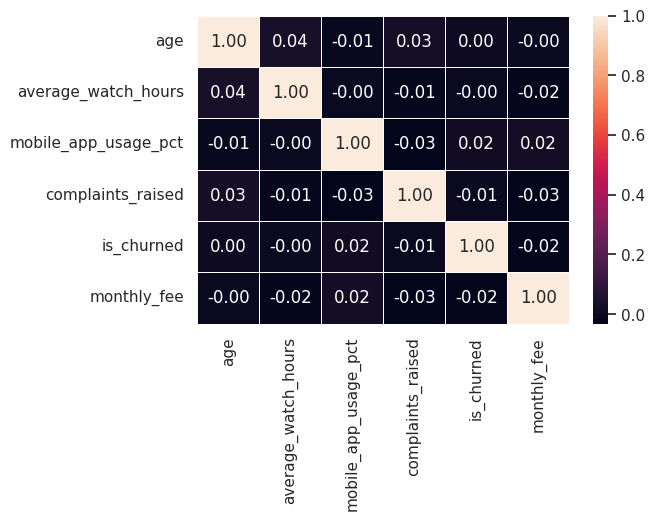

In [ ]:
sns.set_theme()
#  Create a correlation matrix and heatmap (e.g. sns.heatmap()) for numeric variables

# Identify numeric columns
numeric_cols = ['age', 'average_watch_hours', 'mobile_app_usage_pct', 'complaints_raised', 'is_churned', 'monthly_fee']

# fill with mean for missing numeric columns
df_Streamwork[numeric_cols] = df_Streamwork[numeric_cols].apply(pd.to_numeric, errors='coerce')
df_Streamwork[numeric_cols] = df_Streamwork[numeric_cols].fillna(df_Streamwork[numeric_cols].mean())

# Compute correlation matrix
streamwork_corr_matrix = df_Streamwork[numeric_cols].corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(streamwork_corr_matrix, annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.show()

2. Clean & Prepare the Data  

In [ ]:
# Convert signup_date and last_active_date to datetime
df_Streamwork['signup_date'] = pd.to_datetime(df_Streamwork['signup_date'], format='%d-%m-%y', errors='coerce')
df_Streamwork['last_active_date'] = pd.to_datetime(df_Streamwork['last_active_date'], format='%d-%m-%y', errors='coerce')

In [ ]:
# tenure_days (days between signup and last active)
df_Streamwork['tenure_days'] = (df_Streamwork['last_active_date'] - df_Streamwork['signup_date']).dt.days

# is_loyal (True if tenure_days > 180, else False)
df_Streamwork['is_loyal'] = df_Streamwork['tenure_days'] > 180

In [ ]:
# Fill binary columns with the most frequent value ('No')
binary_cols = ['received_promotions', 'referred_by_friend']
for col in binary_cols:
    df_Streamwork[col] = df_Streamwork[col].fillna(df_Streamwork[col].mode()[0])

In [ ]:
# Fill categorical column with 'not provided'
cat_cols = ['gender', 'country', 'subscription_type']
for col in cat_cols:
    df_Streamwork[col] = df_Streamwork[col].fillna('not provided')

In [ ]:
# Fill is_churn with mode
df_Streamwork['is_churned'] = df_Streamwork['is_churned'].fillna(df_Streamwork['is_churned'].mode()[0])

In [ ]:
# One-hot encoding
df_encoded = pd.get_dummies(df_Streamwork, columns=cat_cols + binary_cols,
                            prefix=cat_cols + binary_cols,
                            drop_first=True)

In [ ]:
# Find rows with missing user_id
missing_id = df_Streamwork['user_id'].isna()
df_Streamwork.loc[missing_id, 'user_id'] = df_Streamwork['user_id'].shift(1)[missing_id] + 1

# Convert back to integer (since user_id should be whole numbers)
df_Streamwork['user_id'] = df_Streamwork['user_id'].astype('Int64')  # Capital Int64 allows NaN if any remain (though none should)

# Verification
print("Missing user_id after filling:", df_Streamwork['user_id'].isna().sum())
print("\nSample around first missing (original row ~56):")
print(df_Streamwork.iloc[55:62][['user_id', 'age', 'gender']])

Missing user_id after filling: 0

Sample around first missing (original row ~56):
    user_id   age  gender
55     1056  37.0   Other
56     1057  45.0    Male
57     1058  64.0  Female
58     1059  24.0    Male
59     1060  61.0   Other
60     1061  25.0  Female
61     1062  64.0   Other


In [ ]:
df_Streamwork.head(5)

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee,tenure_days,is_loyal
0,1001,56.0,Other,2025-04-02,2025-07-13,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99,102.0,False
1,1002,69.0,Male,2023-01-02,2025-07-13,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99,923.0,True
2,1003,46.0,Male,2022-08-21,2025-07-13,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99,1057.0,True
3,1004,32.0,Other,2023-09-14,2025-07-13,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99,668.0,True
4,1005,60.0,Female,2023-07-29,2025-07-13,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99,715.0,True


3. Feature Engineering

In [ ]:
# Handle division by zero or missing fee with fillna(0) or small value if needed

df_Streamwork['watch_per_fee_ratio'] = df_Streamwork['average_watch_hours'] / df_Streamwork['monthly_fee']

In [ ]:
# heavy_mobile_user: True if mobile_app_usage_pct > 70
if 'heavy_mobile_user' not in df_Streamwork.columns:
    df_Streamwork['heavy_mobile_user'] = df_Streamwork['mobile_app_usage_pct'] > 70

In [ ]:
#  Save the cleaned dataset to a new CSV file
streamwork_clean = 'streamworks_user_data_cleaned.csv'
df_Streamwork.to_csv(streamwork_clean, index=False)

In [ ]:
# Round the 'monthly_fee' column to 2 decimal places
df_Streamwork['monthly_fee'] = df_Streamwork['monthly_fee'].round(2)

In [ ]:
# Handle discovered missing values in tenure_days with median
df_Streamwork['tenure_days'].fillna(df_Streamwork['tenure_days'].median(), inplace=True)

/tmp/ipython-input-2065704273.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Streamwork['tenure_days'].fillna(df_Streamwork['tenure_days'].median(), inplace=True)


In [ ]:
# Fill missing signup_date:
df_Streamwork['signup_date'] = df_Streamwork['signup_date'].fillna('2025-07-13')

In [ ]:
# Fill missing last_active_date:
df_Streamwork['last_active_date'] = df_Streamwork['last_active_date'].fillna('2025-07-13')

In [ ]:
df_Streamwork.isnull().sum()

,0
user_id,0
age,0
gender,0
signup_date,0
last_active_date,0
country,0
subscription_type,0
average_watch_hours,0
mobile_app_usage_pct,0
complaints_raised,0


In [ ]:
# Apply log transform to watch_per_fee_ratio
# The column has moderate positive skewness (~0.90). Applying a log transformation (using np.log1p for safety with values >0) reduces the skewness to ~-0.33, making the distribution closer to normal.#
df_Streamwork['watch_per_fee_ratio_log'] = np.log1p(df_Streamwork['watch_per_fee_ratio'])

In [ ]:
# Standardize the numerical columns
# Select numerical columns for normalization (exclude binaries like is_churned, is_loyal, heavy_mobile_user)
numerical_cols = ['age', 'average_watch_hours', 'mobile_app_usage_pct', 'complaints_raised',
                  'monthly_fee', 'tenure_days', 'watch_per_fee_ratio_log']
scaler = StandardScaler()
df_Streamwork[numerical_cols] = scaler.fit_transform(df_Streamwork[numerical_cols])

In [ ]:
df_Streamwork.head(5)

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee,tenure_days,is_loyal,watch_per_fee_ratio,heavy_mobile_user,watch_per_fee_ratio_log
0,1001,0.813951,Other,2025-04-02,2025-07-13,France,Standard,0.117553,0.910129,-0.879017,No,No,1.0,0.257397,-1.383709,False,3.876251,True,0.129243
1,1002,1.676947,Male,2023-01-02,2025-07-13,India,Basic,1.107093,1.631632,0.880976,No,Yes,1.0,-1.332195,1.209738,True,10.901503,True,1.559162
2,1003,0.150108,Male,2022-08-21,2025-07-13,UK,Premium,0.008573,-0.126593,-1.465681,No,Yes,1.0,1.211153,1.633029,True,2.866333,False,-0.242657
3,1004,-0.779273,Other,2023-09-14,2025-07-13,Germany,Premium,-1.486635,0.062539,-0.879017,Yes,Yes,1.0,1.211153,0.404222,True,0.414582,False,-1.853959
4,1005,1.079488,Female,2023-07-29,2025-07-13,India,Standard,-0.314009,-1.212349,1.467641,No,Yes,0.0,-0.060521,0.552690,True,3.273273,False,-0.082286


**4. Statistical Analysis & Insights**  

In [ ]:
from scipy.stats import chi2_contingency
# Function to perform chi-square test and return results
def perform_chi_square(feature, target='is_churned'):
    contingency = pd.crosstab(df_Streamwork[feature], df_Streamwork[target])
    chi2, p, dof, expected = chi2_contingency(contingency)
    return {
        'feature': feature,
        'chi2': round(chi2, 4),
        'dof': dof,
        'p_value': round(p, 4),
        'significant': p < 0.05,
        'contingency_table': contingency
    }
# Perform tests for the three features
results = []
for feature in ['gender', 'received_promotions', 'referred_by_friend']:
    results.append(perform_chi_square(feature))
# Print summary
print("Chi-Square Test Results for Association with Churn (is_churned)\n")
print("{:<25} {:<15} {:<10} {:<10} {:<15}".format(
    "Feature", "Chi2 Statistic", "DoF", "p-value", "Significant"))
print("-" * 75)

for res in results:
    print("{:<25} {:<15} {:<10} {:<10} {:<15}".format(
        res['feature'],
        res['chi2'],
        res['dof'],
        res['p_value'],
        'Yes' if res['significant'] else 'No'
    ))
    print("\nContingency Table:")
    print(res['contingency_table'])
    print("\n" + "-" * 75)

# Overall conclusion
print("\nConclusion:")
if any(res['significant'] for res in results):
    print("At least one feature has a significant association with churn (p < 0.05).")
else:
    print("No significant association found between churn and any of the tested features (p >= 0.05).")

Chi-Square Test Results for Association with Churn (is_churned)

Feature                   Chi2 Statistic  DoF        p-value    Significant    
---------------------------------------------------------------------------
gender                    9.4025          6          0.1522     No             

Contingency Table:
is_churned    0.000000  0.234156  1.000000
gender                                    
Female             375         0       135
Male               378         0       105
Other              395         1       110
not provided         0         0         1

---------------------------------------------------------------------------
received_promotions       3.8126          2          0.1486     No             

Contingency Table:
is_churned           0.000000  0.234156  1.000000
received_promotions                              
No                        573         0       193
Yes                       575         1       158

-------------------------------------------

In [ ]:
# Split average_watch_hours into churned and retained groups
churned_watch = df_Streamwork[df_Streamwork['is_churned'] == 1]['average_watch_hours']
retained_watch = df_Streamwork[df_Streamwork['is_churned'] == 0]['average_watch_hours']

# Perform two-sample t-test (Welch's t-test: does not assume equal variances)
t_stat, p_value = stats.ttest_ind(churned_watch, retained_watch, equal_var=False)

# Calculate summary statistics
mean_churned = churned_watch.mean()
mean_retained = retained_watch.mean()
std_churned = churned_watch.std()
std_retained = retained_watch.std()
n_churned = len(churned_watch)
n_retained = len(retained_watch)

# Print the results
print("T-Test Results: Difference in Average Watch Hours between Churned and Retained Users\n")
print(f"Mean watch hours (Churned, n={n_churned}): {mean_churned:.2f} (SD = {std_churned:.2f})")
print(f"Mean watch hours (Retained, n={n_retained}): {mean_retained:.2f} (SD = {std_retained:.2f})")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Significant difference (p < 0.05)? {'Yes' if p_value < 0.05 else 'No'}")

# Interpretation
if p_value < 0.05:
    print("\nConclusion: There is a statistically significant difference in average watch hours "
          "between churned and retained users.")
else:
    print("\nConclusion: There is NO statistically significant difference in average watch hours "
          "between churned and retained users (fail to reject the null hypothesis).")

T-Test Results: Difference in Average Watch Hours between Churned and Retained Users

Mean watch hours (Churned, n=351): -0.01 (SD = 1.01)
Mean watch hours (Retained, n=1148): 0.00 (SD = 1.00)
t-statistic: -0.1795
p-value: 0.8576
Significant difference (p < 0.05)? No

Conclusion: There is NO statistically significant difference in average watch hours between churned and retained users (fail to reject the null hypothesis).


In [ ]:
df_Streamwork.head()

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee,tenure_days,is_loyal,watch_per_fee_ratio,heavy_mobile_user,watch_per_fee_ratio_log
0,1001,0.813951,Other,2025-04-02,2025-07-13,France,Standard,0.117553,0.910129,-0.879017,No,No,1.0,0.257397,-1.383709,False,3.876251,True,0.129243
1,1002,1.676947,Male,2023-01-02,2025-07-13,India,Basic,1.107093,1.631632,0.880976,No,Yes,1.0,-1.332195,1.209738,True,10.901503,True,1.559162
2,1003,0.150108,Male,2022-08-21,2025-07-13,UK,Premium,0.008573,-0.126593,-1.465681,No,Yes,1.0,1.211153,1.633029,True,2.866333,False,-0.242657
3,1004,-0.779273,Other,2023-09-14,2025-07-13,Germany,Premium,-1.486635,0.062539,-0.879017,Yes,Yes,1.0,1.211153,0.404222,True,0.414582,False,-1.853959
4,1005,1.079488,Female,2023-07-29,2025-07-13,India,Standard,-0.314009,-1.212349,1.467641,No,Yes,0.0,-0.060521,0.552690,True,3.273273,False,-0.082286


Pearson Correlations with Churn (is_churned)
age                     0.0021
average_watch_hours    -0.0041
mobile_app_usage_pct    0.0164
complaints_raised      -0.0055
monthly_fee            -0.0244
tenure_days             0.0100
Name: is_churned, dtype: float64

Interpretation: Values close to 0 indicate weak/no linear relationship with churn.
Strongest (though still very weak): monthly_fee (-0.0244), mobile_app_usage_pct (0.0164)



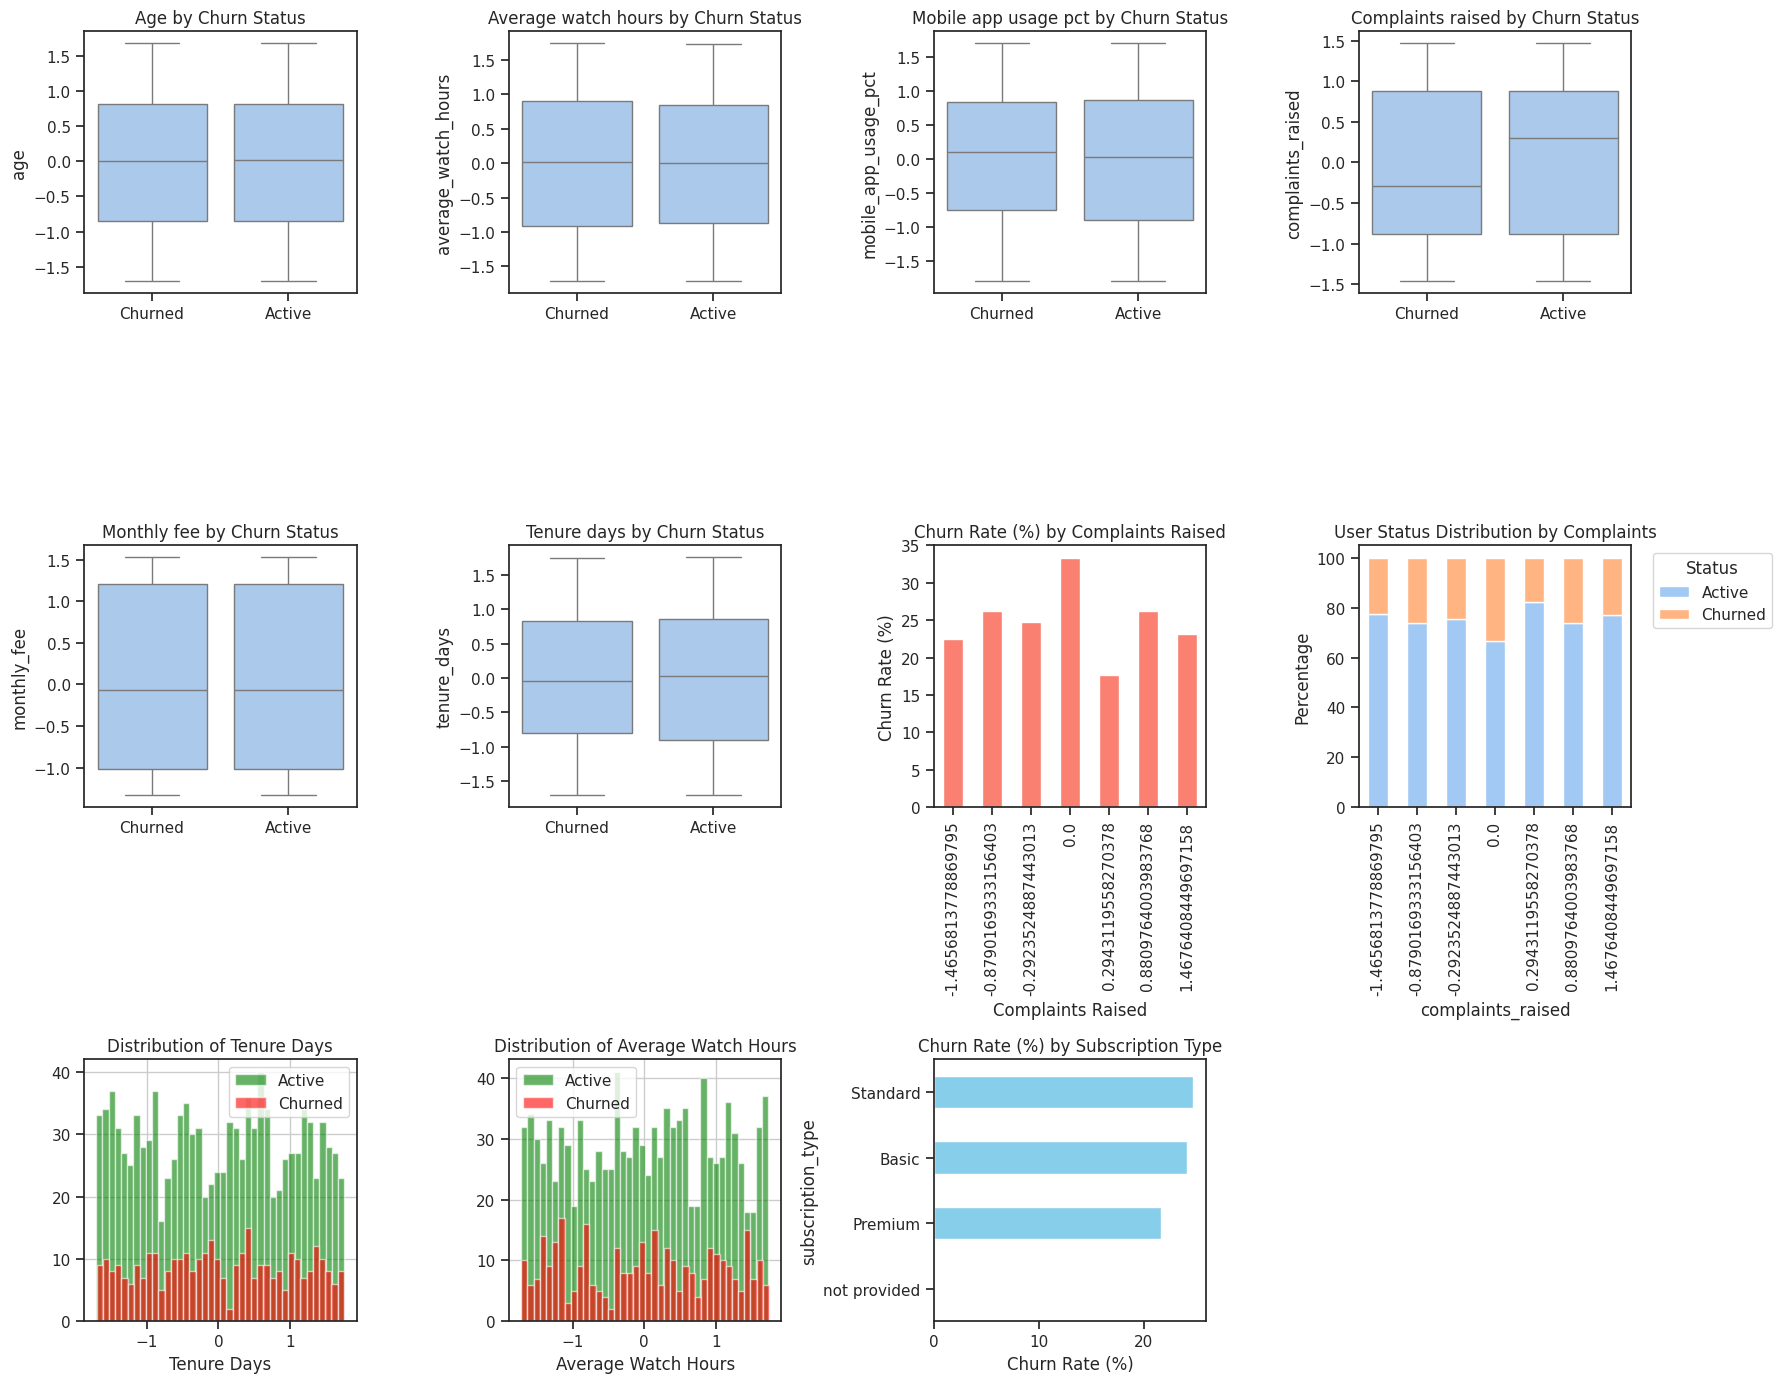

In [ ]:
# Convert is_churned to boolean and create a readable label column
df_Streamwork['is_churned'] = df_Streamwork['is_churned'].astype(bool)
df_Streamwork['churn_status'] = df_Streamwork['is_churned'].map({True: 'Churned', False: 'Active'})

# Key numerical features to analyze
numerical_features = ['age', 'average_watch_hours', 'mobile_app_usage_pct',
                      'complaints_raised', 'monthly_fee', 'tenure_days']

# 1. Correlation Analysis
print("Pearson Correlations with Churn (is_churned)")
correlations = df_Streamwork[numerical_features + ['is_churned']].corr()['is_churned'].drop('is_churned')
print(correlations.round(4))
print("\nInterpretation: Values close to 0 indicate weak/no linear relationship with churn.")
print("Strongest (though still very weak): monthly_fee (-0.0244), mobile_app_usage_pct (0.0164)\n")

# Set plot style
sns.set(style="ticks", palette="pastel")

# Create a large figure with multiple subplots
fig = plt.figure(figsize=(18, 14))

# 2. Boxplots for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    ax = fig.add_subplot(3, 4, i)
    sns.boxplot(data=df_Streamwork, x='churn_status', y=feature, ax=ax)
    ax.set_title(f'{feature.replace("_", " ").capitalize()} by Churn Status')
    ax.set_xlabel('')

# 3. Bar plot: Churn rate by complaints_raised
ax7 = fig.add_subplot(3, 4, 7)
churn_rate_by_complaints = df_Streamwork.groupby('complaints_raised')['is_churned'].mean() * 100
churn_rate_by_complaints.plot(kind='bar', color='salmon', ax=ax7)
ax7.set_title('Churn Rate (%) by Complaints Raised')
ax7.set_ylabel('Churn Rate (%)')
ax7.set_xlabel('Complaints Raised')

# 4. Stacked bar: Distribution of complaints
ax8 = fig.add_subplot(3, 4, 8)
complaints_dist = pd.crosstab(df_Streamwork['complaints_raised'], df_Streamwork['churn_status'], normalize='index') * 100
complaints_dist.plot(kind='bar', stacked=True, ax=ax8)
ax8.set_title('User Status Distribution by Complaints')
ax8.set_ylabel('Percentage')
ax8.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# 5. Histogram overlay: Tenure Days
ax9 = fig.add_subplot(3, 4, 9)
df_Streamwork[df_Streamwork['churn_status'] == 'Active']['tenure_days'].hist(alpha=0.6, label='Active', bins=40, color='green')
df_Streamwork[df_Streamwork['churn_status'] == 'Churned']['tenure_days'].hist(alpha=0.6, label='Churned', bins=40, color='red')
ax9.set_title('Distribution of Tenure Days')
ax9.set_xlabel('Tenure Days')
ax9.legend()

# 6. Histogram overlay: Average Watch Hours
ax10 = fig.add_subplot(3, 4, 10)
df_Streamwork[df_Streamwork['churn_status'] == 'Active']['average_watch_hours'].hist(alpha=0.6, label='Active', bins=40, color='green')
df_Streamwork[df_Streamwork['churn_status'] == 'Churned']['average_watch_hours'].hist(alpha=0.6, label='Churned', bins=40, color='red')
ax10.set_title('Distribution of Average Watch Hours')
ax10.set_xlabel('Average Watch Hours')
ax10.legend()

# 7. Additional useful: Churn rate by subscription_type
ax11 = fig.add_subplot(3, 4, 11)
churn_by_sub = df_Streamwork.groupby('subscription_type')['is_churned'].mean().sort_values() * 100
churn_by_sub.plot(kind='barh', color='skyblue', ax=ax11)
ax11.set_title('Churn Rate (%) by Subscription Type')
ax11.set_xlabel('Churn Rate (%)')

plt.tight_layout()
plt.show()

**5. Predictive Modelling** : Logistic regression



/tmp/ipython-input-2643109570.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Streamwork['tenure_days'].fillna(df_Streamwork['tenure_days'].median(), inplace=True)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
[[220   0]
 [ 80   0]]

Precision: 0.0
Recall: 0.0
F1 Score: 0.0

AUC Score: 0.49784090909090906


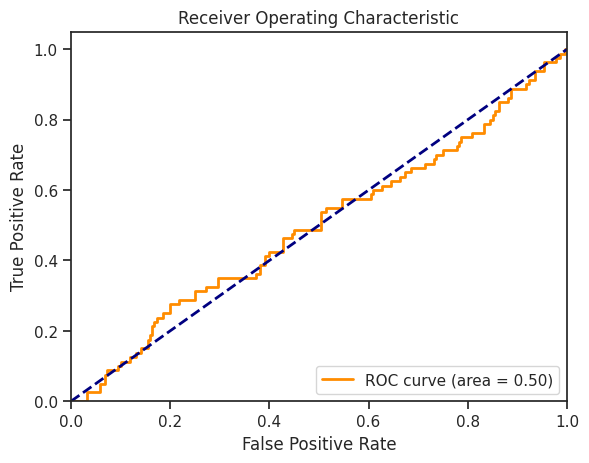


Sorted Coefficients:
                           Feature  Coefficient  Abs_Coefficient
18  subscription_type_not provided    -0.232863         0.232863
15            country_not provided    -0.224495         0.224495
9              gender_not provided     0.202841         0.202841
6              watch_per_fee_ratio    -0.197432         0.197432
21                        is_loyal     0.162219         0.162219
13                      country_UK     0.158433         0.158433
4                      monthly_fee    -0.155688         0.155688
7                      gender_Male    -0.110339         0.110339
8                     gender_Other    -0.101194         0.101194
1              average_watch_hours     0.101074         0.101074
20          referred_by_friend_Yes    -0.093788         0.093788
19         received_promotions_Yes    -0.090081         0.090081
10                  country_France     0.082297         0.082297
12                   country_India     0.062560         0.062560
17 

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

# Clean anomalous is_churned values (keep only 0.0 and 1.0)
df_Streamwork = df_Streamwork[df_Streamwork['is_churned'].isin([0.0, 1.0])]

# Convert is_churned to integer
df_Streamwork['is_churned'] = df_Streamwork['is_churned'].astype(int)

# Impute missing tenure_days with median
df_Streamwork['tenure_days'].fillna(df_Streamwork['tenure_days'].median(), inplace=True)

# Define feature columns
categorical_cols = ['gender', 'country', 'subscription_type', 'received_promotions', 'referred_by_friend']
numeric_cols = ['age', 'average_watch_hours', 'mobile_app_usage_pct', 'complaints_raised', 'monthly_fee', 'tenure_days', 'watch_per_fee_ratio']
bool_cols = ['is_loyal', 'heavy_mobile_user']

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_Streamwork[categorical_cols], drop_first=True)

# Convert boolean columns to integers
df_bool = df_Streamwork[bool_cols].astype(int)

# Combine all features into X
X = pd.concat([df_Streamwork[numeric_cols], df_encoded, df_bool], axis=1)

# Target variable
y = df_Streamwork['is_churned']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit LogisticRegression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict classes
y_pred = model.predict(X_test_scaled)

# Predict probabilities (probability of class 1)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("\nAUC Score:", roc_auc)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Model Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)
print("\nSorted Coefficients:")
print(coefficients)

**Linear Regression** (Continuous Prediction)

R²: 1.0
RMSE: 7.994306453813685e-15

Sorted Coefficients:
                            Feature   Coefficient  Abs_Coefficient
5                      tenure_days  1.000000e+00     1.000000e+00
9              gender_not provided -2.765990e-15     2.765990e-15
6              watch_per_fee_ratio  2.184200e-15     2.184200e-15
4                      monthly_fee -8.536362e-16     8.536362e-16
15            country_not provided -7.401410e-16     7.401410e-16
0                              age  6.143608e-16     6.143608e-16
16       subscription_type_Premium  4.680252e-16     4.680252e-16
17      subscription_type_Standard  4.640385e-16     4.640385e-16
1              average_watch_hours  4.440892e-16     4.440892e-16
3                complaints_raised  3.285009e-16     3.285009e-16
18  subscription_type_not provided -2.764716e-16     2.764716e-16
19         received_promotions_Yes  2.064321e-16     2.064321e-16
11                 country_Germany  2.015299e-16     2.015299e-16
20          refer

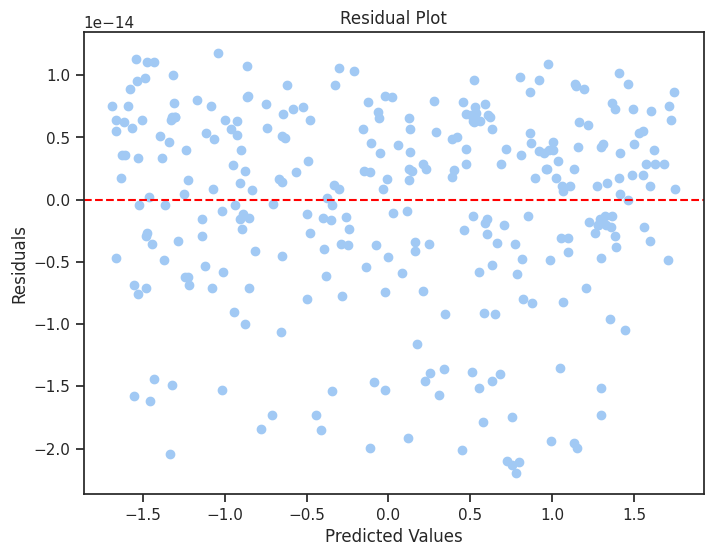

In [ ]:
# Combine X
X = pd.concat([df_Streamwork[numeric_cols], df_encoded], axis=1)

# Target
y = df_Streamwork['tenure_days']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R²:', r2)
print('RMSE:', rmse)

# Coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)
print('\nSorted Coefficients:\n', coefficients)

# Residual plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()